In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
columns = [
	'duration',
	'protocol_type',
	'service',
	'flag',
	'src_bytes',
	'dst_bytes',
	'land',
	'wrong_fragment',
	'urgent',
	'hot',
	'num_failed_logins',
	'logged_in',
	'num_compromised',
	'root_shell',
	'su_attempted',
	'num_root',
	'num_file_creations',
	'num_shells',
	'num_access_files',
	'num_outbound_cmds',
	'is_host_login',
	'is_guest_login',
	'count',
	'srv_count',
	'serror_rate',
	'srv_serror_rate',
	'rerror_rate',
	'srv_rerror_rate',
	'same_srv_rate',
	'diff_srv_rate',
	'srv_diff_host_rate',
	'dst_host_count',
	'dst_host_srv_count',
	'dst_host_same_srv_rate',
	'dst_host_diff_srv_rate',
	'dst_host_same_src_port_rate',
	'dst_host_srv_diff_host_rate',
	'dst_host_serror_rate',
	'dst_host_srv_serror_rate',
	'dst_host_rerror_rate',
	'dst_host_srv_rerror_rate',
	'label',
	'difficulty_level'
]

class_map = {
"back":"DoS",
"land":"DoS",
"neptune":"DoS",
"pod":"DoS",
"smurf":"DoS",
"teardrop":"DoS",
"processtable":"DoS",
"udpstorm":"DoS",
"mailbomb":"DoS",
"apache2":"DoS",
"ipsweep":"probe",
"mscan":"probe",
"nmap":"probe",
"portsweep":"probe",
"saint":"probe",
"satan":"probe",
"ftp_write":"R2L",
"guess_passwd":"R2L",
"imap":"R2L",
"multihop":"R2L",
"phf":"R2L",
"warezmaster":"R2L",
"warezclient":"R2L",
"spy":"R2L",
"sendmail":"R2L",
"xlock":"R2L",
"snmpguess":"R2L",
"named":"R2L",
"xsnoop":"R2L",
"snmpgetattack":"R2L",
"worm":"R2L",
"buffer_overflow":"U2R",
"loadmodule":"U2R",
"perl":"U2R",
"rootkit":"U2R",
"xterm":"U2R",
"ps":"U2R",
"httptunnel":"U2R",
"sqlattack":"U2R",
"normal":"normal"
}

train_df = pd.read_csv('KDDTrain+.txt', names=columns)
test_df = pd.read_csv('KDDTest+.txt', names=columns)

train_df.drop('difficulty_level', axis=1, inplace=True)
test_df.drop('difficulty_level', axis=1, inplace=True)

In [3]:
train_df.drop(train_df.columns[9:22], axis=1, inplace=True)
test_df.drop(test_df.columns[9:22], axis=1, inplace=True)

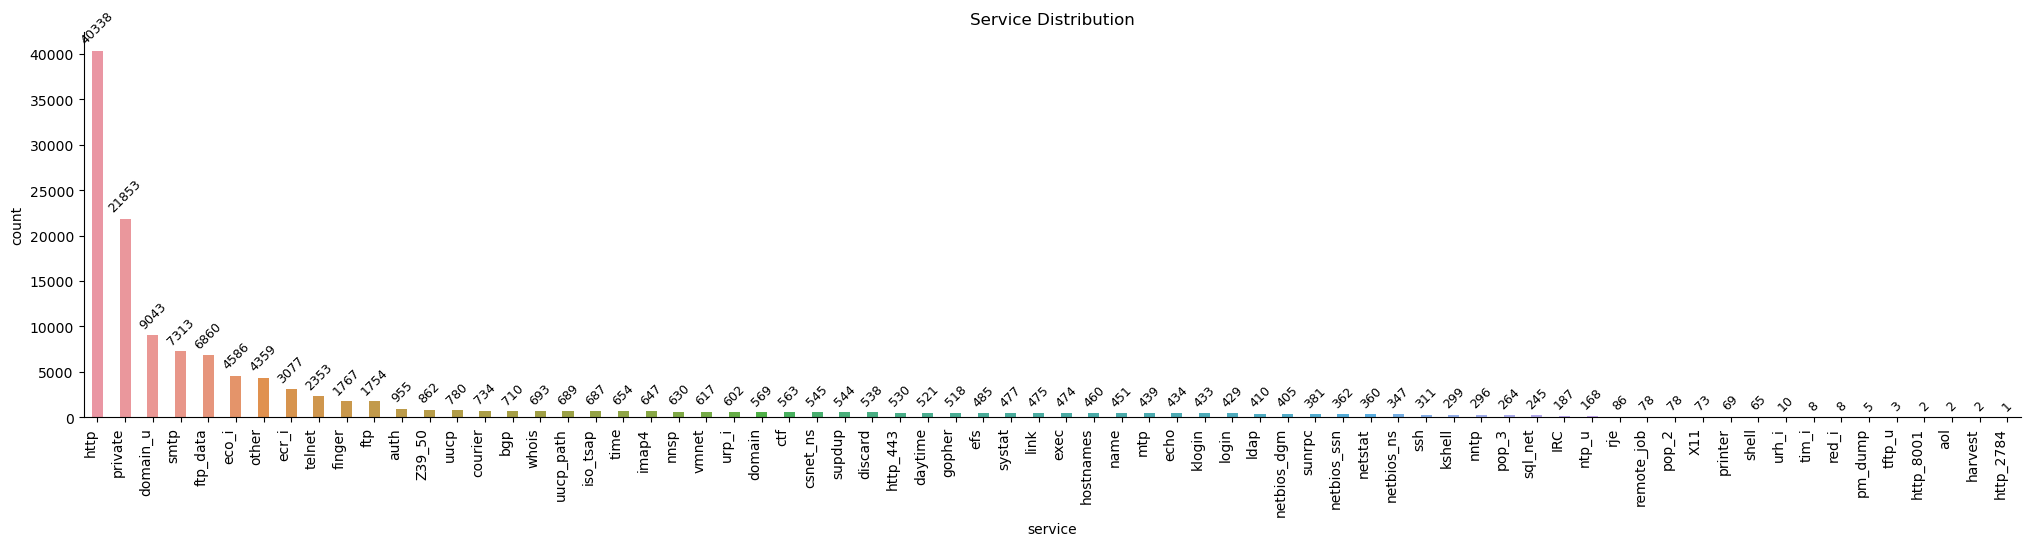

In [4]:

plt.figure(figsize=(25,5))

ax = sns.countplot(data = train_df, x = 'service', order = train_df['service'].value_counts().index, width=0.4)
ax.set_title('Service Distribution')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9, padding=3, rotation=45)

sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

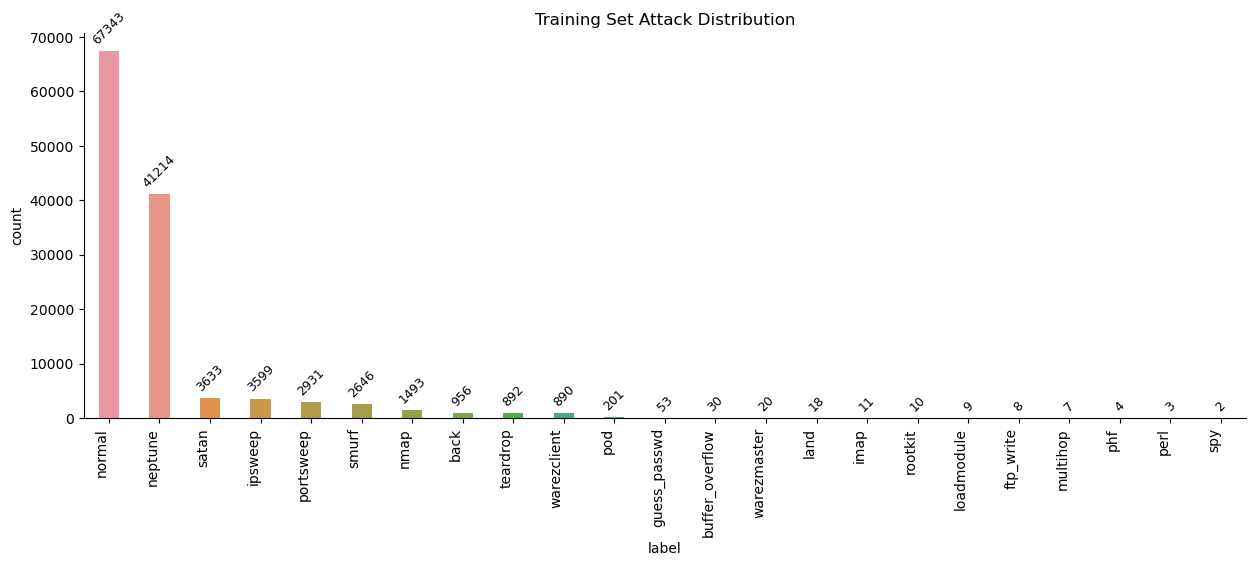

In [5]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data = train_df, x = 'label', order = train_df['label'].value_counts().index, width=0.4)
ax.set_title('Training Set Attack Distribution')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9, padding=3, rotation=45)

sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

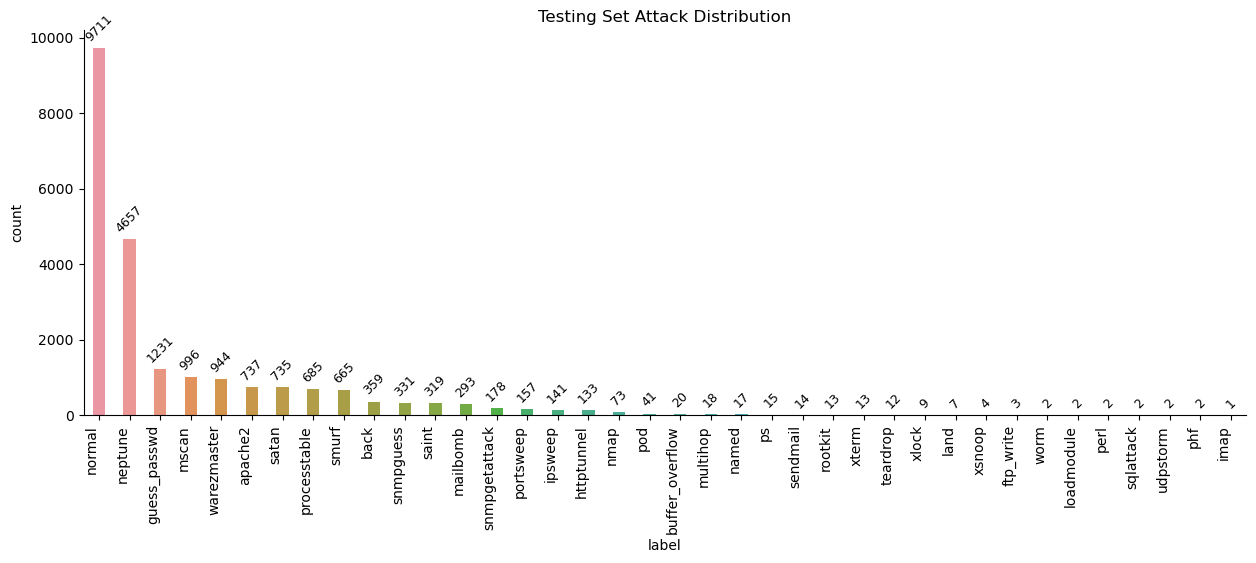

In [6]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data = test_df, x = 'label', order = test_df['label'].value_counts().index, width=0.4)
ax.set_title('Testing Set Attack Distribution')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9, padding=3, rotation=45)

sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [7]:
print("train - test:", set(train_df['label'].unique()) - set(test_df['label'].unique()))

train - test: {'warezclient', 'spy'}


In [8]:
print("test - train:",set(test_df['label'].unique()) - set(train_df['label'].unique()))

test - train: {'mailbomb', 'snmpguess', 'processtable', 'udpstorm', 'saint', 'httptunnel', 'mscan', 'xterm', 'sqlattack', 'apache2', 'snmpgetattack', 'xlock', 'sendmail', 'ps', 'xsnoop', 'named', 'worm'}


In [9]:
print(f'{train_df.shape =}')
print(f'{test_df.shape =}')

train_df.shape =(125973, 29)
test_df.shape =(22544, 29)


In [10]:
X = pd.concat([train_df, test_df], ignore_index=True)
X.shape

(148517, 29)

In [11]:
X.replace({'label': class_map}, inplace=True)

In [12]:
categorical_inputs = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'label']
categorical_inputs = list(set(categorical_inputs).intersection(X.columns))
categorical_inputs

['label', 'protocol_type', 'flag', 'land', 'service']

In [13]:
X[categorical_inputs] = X[categorical_inputs].astype('category')

In [14]:
attack_labels = list(X['label'].cat.categories)

In [15]:
print(f'{attack_labels = }')

attack_labels = ['DoS', 'R2L', 'U2R', 'normal', 'probe']


In [16]:
y = X['label']
X.drop('label', axis=1, inplace=True)

In [17]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

In [19]:
# split the df into a df with numeric inputs and a df with categorical inputs
X_train_numeric = X_train.select_dtypes(exclude='category')
X_train_cat = X_train.select_dtypes(include='category')

X_test_numeric = X_test.select_dtypes(exclude='category')
X_test_cat = X_test.select_dtypes(include='category')


In [20]:
display(X_train_numeric.head())
display(X_train_cat.head())

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
22242,0,0,0,0,0,2,2,0.5,0.50,0.0,...,153,119,0.50,0.04,0.01,0.02,0.01,0.01,0.01,0.0
124626,0,0,0,0,0,215,15,1.0,1.00,0.0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.0
32022,0,0,0,0,0,10,12,1.0,0.83,0.0,...,32,144,0.31,0.06,0.03,0.01,0.94,0.07,0.00,0.0
89388,23241,3395,11592,0,0,1,1,0.0,0.00,1.0,...,6,2,0.33,0.50,0.17,0.00,0.00,0.00,0.33,1.0
40079,0,0,0,0,0,139,18,1.0,1.00,0.0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.0


,protocol_type,service,flag,land
22242,tcp,smtp,S0,0
124626,tcp,Z39_50,S0,0
32022,tcp,smtp,S0,0
89388,tcp,IRC,RSTR,0
40079,tcp,private,S0,0


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

scaler = MinMaxScaler()
X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_numeric = pd.DataFrame(scaler.transform(X_test_numeric), columns=X_test_numeric.columns)

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.values.reshape(-1, 1)).toarray()


In [22]:
# convert each column in cat_inputs into its corresponding ordinal values
cat_input_codes = {}

for col in X_train_cat.columns:
	cat_input_codes[col] = list(X_train_cat[col].cat.categories)
	X_train_cat[col] = X_train_cat[col].cat.codes

for col in X_test_cat.columns:
	X_test_cat[col] = X_test_cat[col].cat.codes


In [23]:
def emb_sz_rule(n_cat:int)->int: return min(600, round(1.6 * n_cat**0.56))

In [24]:
from keras.layers import Embedding, Input, Flatten, Dense, Concatenate
cat_input_layers = []
embeddings = []
for col in X_train_cat.columns:
	n_cat = len(cat_input_codes[col])
	emb_sz = emb_sz_rule(n_cat)
	_input = Input(shape=(1,), name=col)
	embedding = Embedding(n_cat, emb_sz)(_input)
	embedding = Flatten(name=col + '_embedding')(embedding)
	cat_input_layers.append(_input)
	embeddings.append(embedding)


In [25]:
from keras.models import Model
numeric_input_layer = Input(shape=(X_train_numeric.shape[1],), name='numeric_inputs')

x = Concatenate()([numeric_input_layer] + embeddings)

x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(len(attack_labels), activation='softmax')(x)

model = Model(inputs=[numeric_input_layer] + cat_input_layers, outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 protocol_type (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 service (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 flag (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 land (InputLayer)              [(None, 1)]          0           []                               
                                                                                              

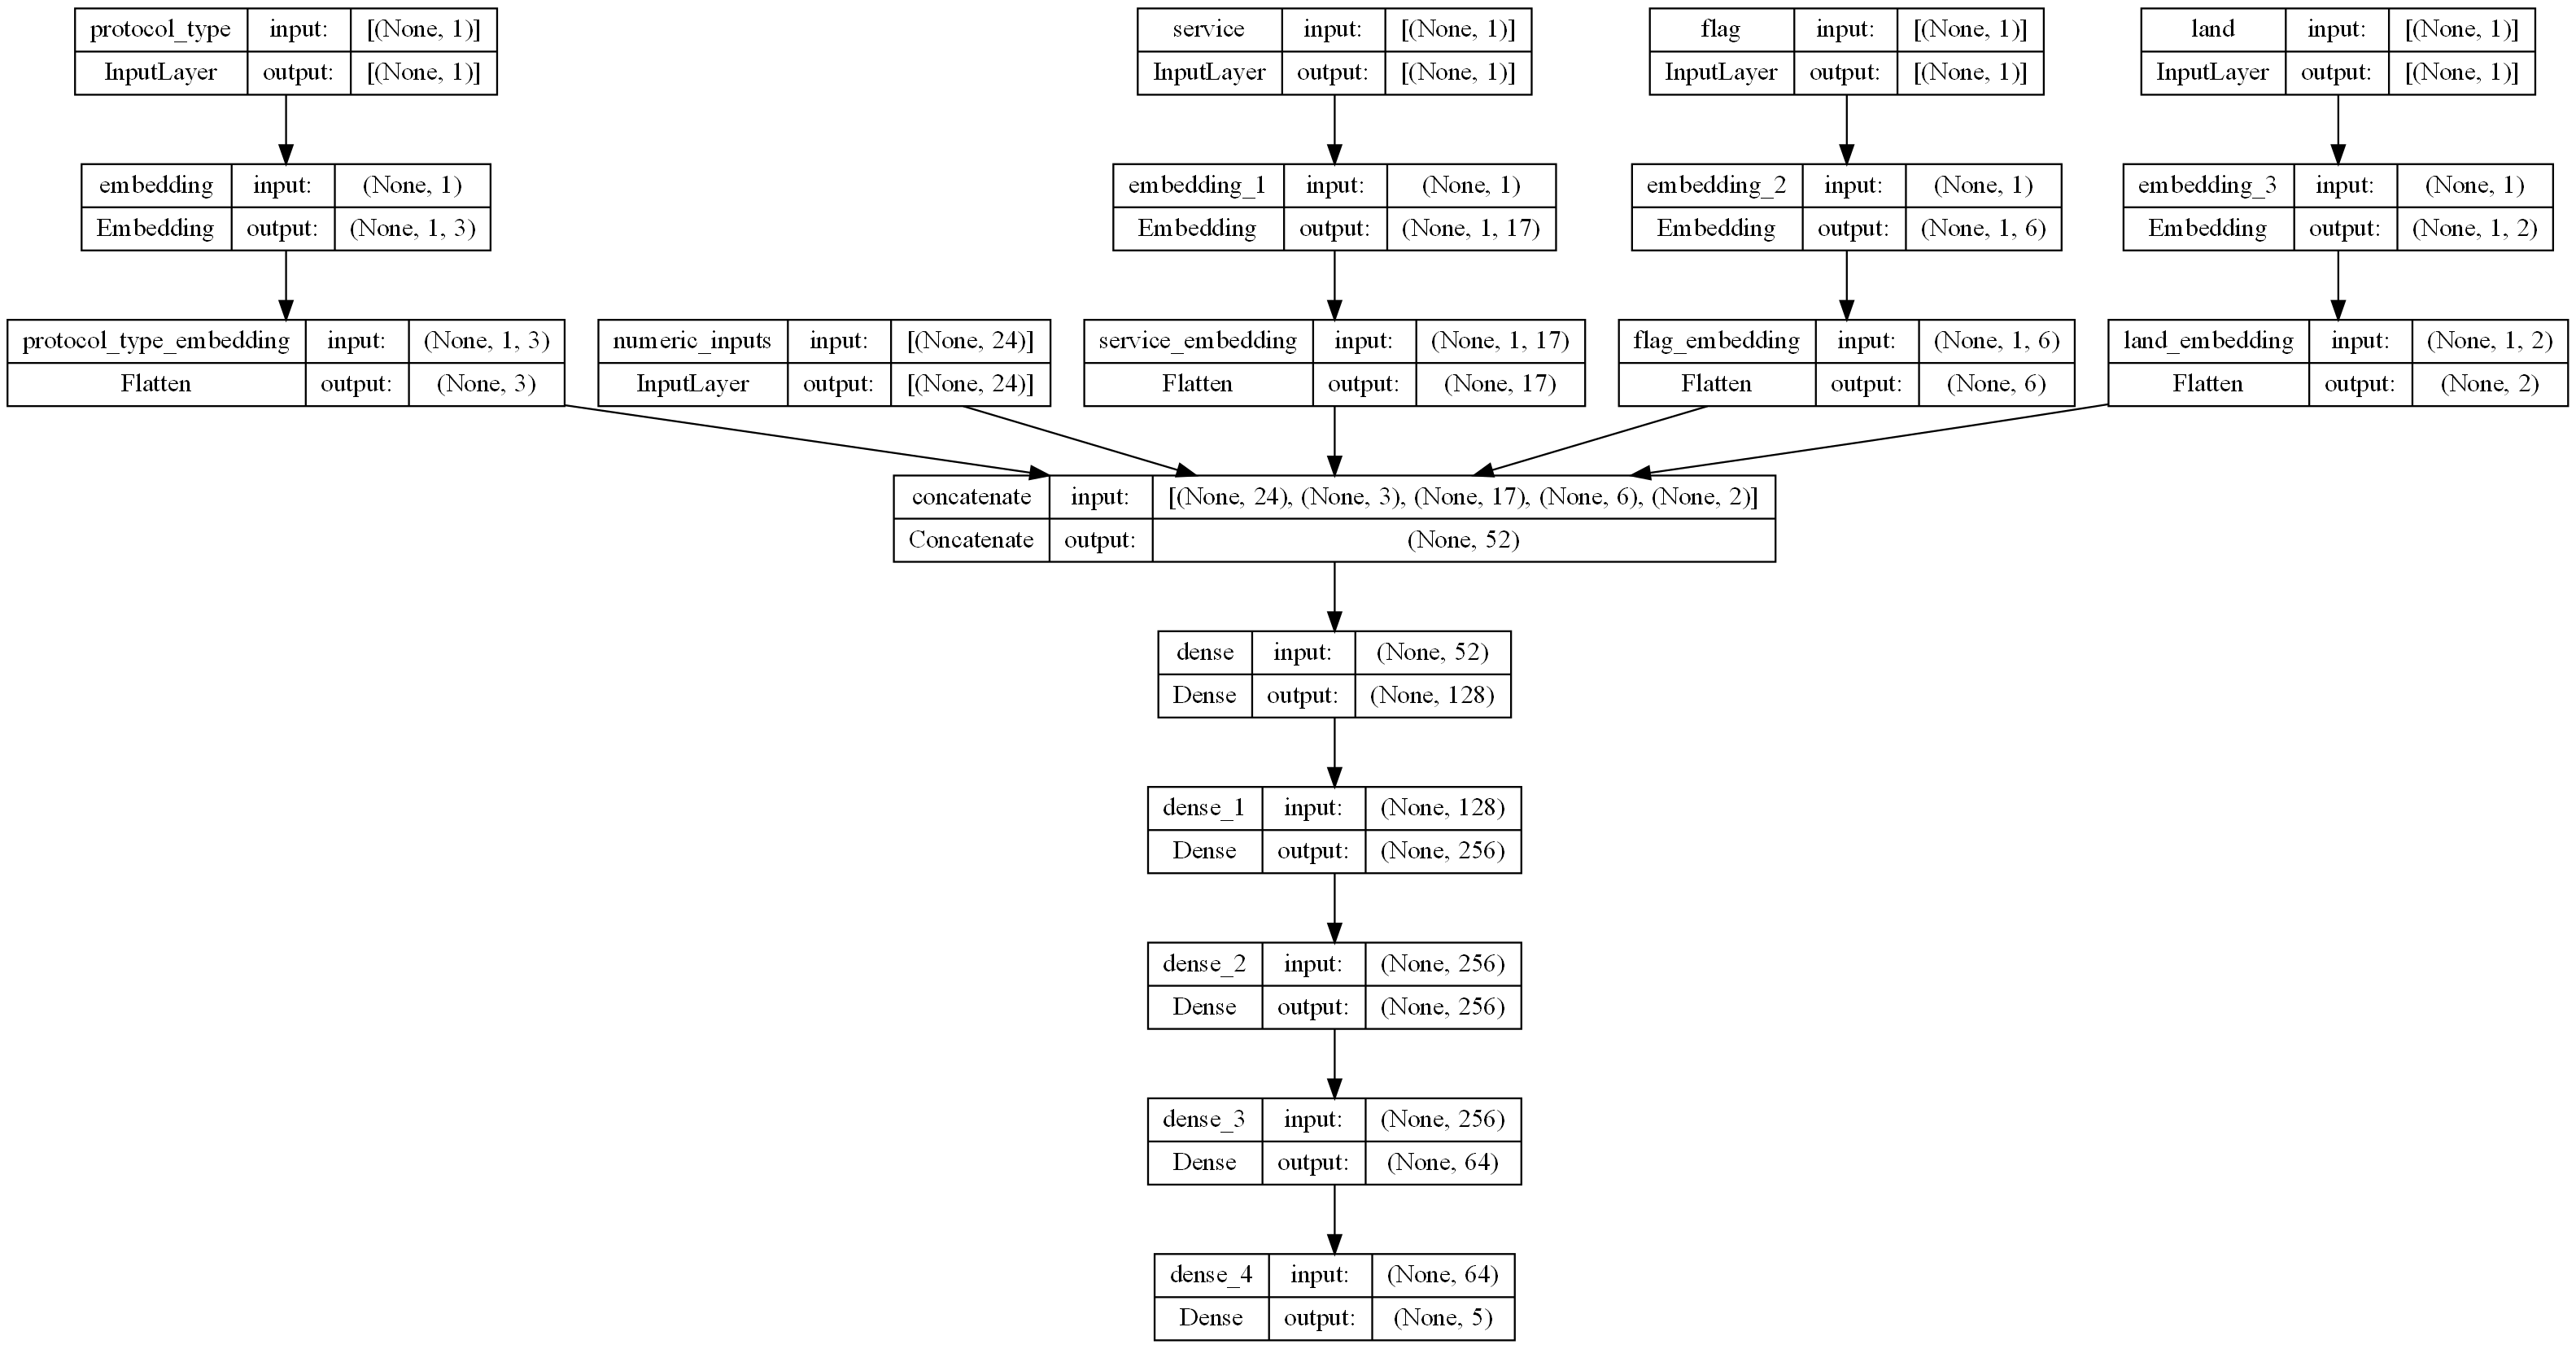

In [26]:
from keras.utils import plot_model


plot_model(model, show_shapes=True, show_layer_names=True, dpi=166)

In [27]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit([X_train_numeric] + [X_train_cat[col] for col in X_train_cat.columns], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2971/2971 [==============================] - 23s 7ms/step - loss: 0.1893 - accuracy: 0.9429 - val_loss: 0.0980 - val_accuracy: 0.9649
Epoch 2/10
2971/2971 [==============================] - 19s 6ms/step - loss: 0.0840 - accuracy: 0.9721 - val_loss: 0.0759 - val_accuracy: 0.9737
Epoch 3/10
2971/2971 [==============================] - 20s 7ms/step - loss: 0.0704 - accuracy: 0.9759 - val_loss: 0.0785 - val_accuracy: 0.9755
Epoch 4/10
2971/2971 [==============================] - 20s 7ms/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 0.0661 - val_accuracy: 0.9762
Epoch 5/10
2971/2971 [==============================] - 19s 6ms/step - loss: 0.0571 - accuracy: 0.9800 - val_loss: 0.0591 - val_accuracy: 0.9787
Epoch 6/10
2971/2971 [==============================] - 19s 6ms/step - loss: 0.0525 - accuracy: 0.9817 - val_loss: 0.0586 - val_accuracy: 0.9790
Epoch 7/10
2971/2971 [==============================] - 19s 6ms/step - loss: 0.0500 - accuracy: 0.9825 - val_loss: 0.0521 - val_ac

In [28]:
def plot_history(history, metric: str):
	plt.plot(history.history[metric], label='train')
	plt.plot(history.history[f'val_{metric}'], label='validation')
	plt.title(f'{metric.title()} of Model')
	plt.xlabel('Epoch')
	plt.ylabel(metric.title())
	plt.legend()
	plt.grid()
	plt.show()

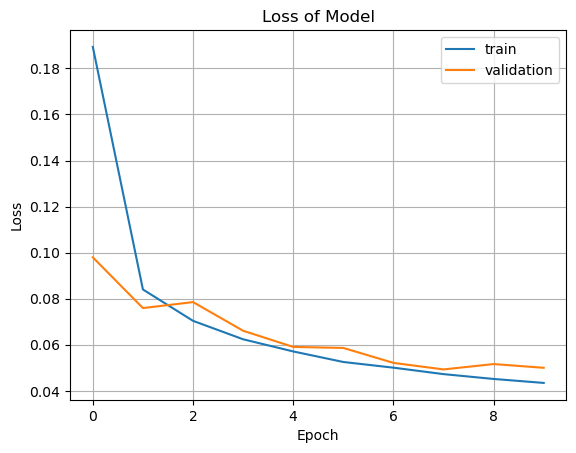

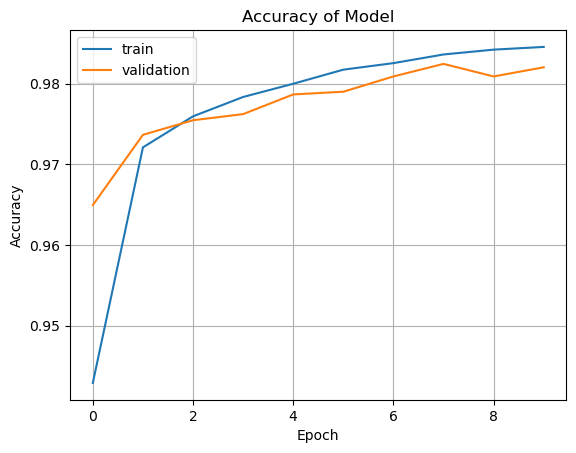

In [29]:
plot_history(history, 'loss')
plot_history(history, 'accuracy')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_test.argmax(axis=1)
y_pred = model.predict([X_test_numeric] + [X_test_cat[col] for col in X_test_cat.columns])

conf_matrix = confusion_matrix(y_true, y_pred.argmax(axis=1))
display(pd.DataFrame(conf_matrix, index=attack_labels, columns=attack_labels))

print(classification_report(y_true, y_pred.argmax(axis=1), target_names=attack_labels))

929/929 [==============================] - 4s 4ms/step


,DoS,R2L,U2R,normal,probe
DoS,10655,0,0,20,2
R2L,1,621,0,125,3
U2R,0,6,20,24,0
normal,127,87,0,15149,48
probe,4,2,1,25,2784


              precision    recall  f1-score   support

         DoS       0.99      1.00      0.99     10677
         R2L       0.87      0.83      0.85       750
         U2R       0.95      0.40      0.56        50
      normal       0.99      0.98      0.99     15411
       probe       0.98      0.99      0.98      2816

    accuracy                           0.98     29704
   macro avg       0.96      0.84      0.87     29704
weighted avg       0.98      0.98      0.98     29704



In [31]:
from sklearn.metrics import auc, roc_curve

def plot_roc(y_actual: np.ndarray, y_pred: np.ndarray, class_names: list):
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_actual[:, i], y_pred[:, i])
        plt.plot(fpr, tpr, label=f'{class_name} - AUC: {auc(fpr, tpr):.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

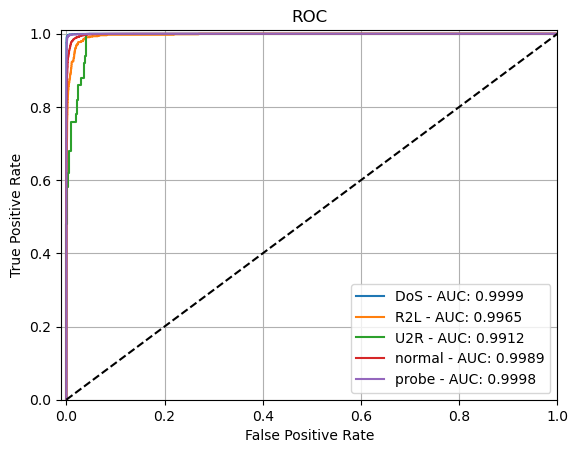

In [32]:
plot_roc(y_test, y_pred, attack_labels)

In [33]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall(y_actual: np.ndarray, y_pred: np.ndarray, class_names: list):
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_actual[:, i], y_pred[:, i])
        plt.plot(recall, precision, label=f'{class_name}')
    plt.xlim([0, 1])
    plt.ylim([0, 1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

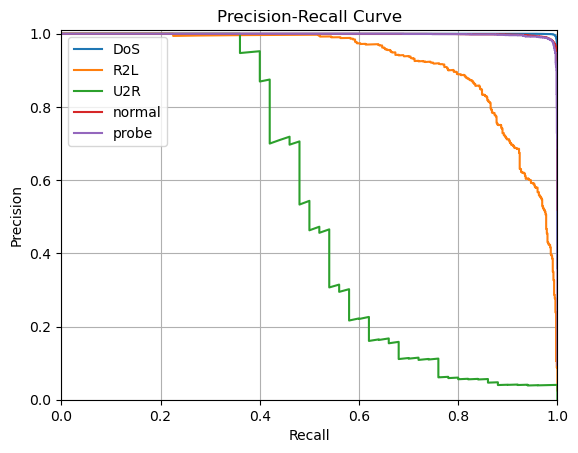

In [34]:
plot_precision_recall(y_test, y_pred, attack_labels)

In [35]:
model.save('signature_detection.keras')

In [36]:
import pickle
pickle.dump(scaler, open('SD_scaler.pkl', 'wb'))
pickle.dump(cat_input_codes, open('SD_cat_input_codes.pkl', 'wb'))